# **Proyecto ML:** ***Nivel de obesidad***


**Autora:** Itziar Cid Garcia

**Institución:** The Bridge

**Fecha:** Febrero 2024

<p align="center">
  <img src="https://www-rockandpop-cl.cdn.ampproject.org/i/s/www.rockandpop.cl/wp-content/uploads/2019/10/obesidad-y-sobrepeso-como-prevenir.jpg" alt="Texto alternativo" width="600" height="300">
</p>

### **1.Introducción**

Este análisis se centra en el estudio de los registros de individuos aleatorios, a partir de características fisiológicas y hábitos de los mismos.

Como principal objetivo se desea predecir el nivel de obesidad en el que se encuentran los individuos, para así poder evitar complicaciones de salud a futuro. Para ello emplearemos técnicas de Machine Learning.

La **target** es 'NObeyesdad', es una variable cualitativa, realizaremos una predicción multiclase, ya que tiene 7 clasificaciones posibles: Insufficient_Weight, Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Obesity_Type_II y Obesity_Type_III,  por lo que aplicaremos modelos de clasificación y utilizaremos el accuracy como métrica principal de evaluación para el modelo.

### **2.Librerías**

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np
pd.set_option('display.max.column',None)

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from scipy.stats import shapiro


### **3.Carga de datos**

In [2]:
df=pd.read_csv('../data/raw/train.csv')

### **4.Primera exploración**

**4.1.Primera visualización del DataFrame**

In [3]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.tail()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II
20757,20757,Male,26.680376,1.816547,118.134898,yes,yes,3.000000,3.000000,Sometimes,no,2.003563,no,0.684487,0.713823,Sometimes,Public_Transportation,Obesity_Type_II


**4.2.Estructura del DataFrame**

In [5]:
df.shape

(20758, 18)

**4.3.Clasificación de variables**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

**4.4.Revisión de duplicados**

In [7]:
df.duplicated().sum()

0

**4.5.Revisión de valores faltantes**

In [8]:
df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

**4.6.Resumen estadístico general del DataFrame**

In [9]:
df.describe(exclude='object').round(2)

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00,20758.00,20758.00,20758.00,20758.00,20758.00,20758.00,20758.00,20758.00
mean,10378.50,23.84,1.70,87.89,2.45,2.76,2.03,0.98,0.62
std,5992.46,5.69,0.09,26.38,0.53,0.71,0.61,0.84,0.60
min,0.00,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,5189.25,20.00,1.63,66.00,2.00,3.00,1.79,0.01,0.00
50%,10378.50,22.82,1.70,84.06,2.39,3.00,2.00,1.00,0.57
75%,15567.75,26.00,1.76,111.60,3.00,3.00,2.55,1.59,1.00
max,20757.00,61.00,1.98,165.06,3.00,4.00,3.00,3.00,2.00


In [10]:
df.describe(include='object')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


**4.7.Descripción general de los datos**

En esta primera exploración observamos los siguiente:

* El conjunto de datos contiene 20758 entradas (individuos) y diversas variables como edad, peso, altura etc.

* Nuestro DataFrame tiene 20758 observaciones y 18 columnas. De las 18 variables que contiene, 9 son cualitativas y 9 son cuantitativas. No tenemos valores duplicados. 

* Valores faltantes: No hay valores faltantes en ninguna de las columnas, lo que indica que el conjunto de datos está completo.

### **5.EDA**

In [11]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

**5.1.Explicación de las variables**

**Target:**

Nobeyesdad: nivel de obesidad. (Insufficient_Weight, Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Obesity_Type_II y Obesity_Type_III)

**Features:**

+ id: Id del individuo. (único por individuo)

+ Gender: género del individuo (femenino/masculino)

+ Age: edad del individuo (14-61)

+ Height: altura del individuo (m)

+ Weight: peso del individuo (kg)

+ family_history_with_overweight: Antecedentes familiares con sobrepeso (si/no)

+ FAVC: Consumo frecuente de alimentos ricos en calorías (si/no)
 
+ FCVC: Frecuencia de ingesta de vegetales en las comidas (1-3)

+ NCP: Número de comidas principales (1-4)

+ CAEC: Consumo de alimentos entre comidas (Sometimes, Frequently, no, Always)

+ CH2O: Consumo de agua diario (1-3)

+ CALC: Consumo de alcohol (Sometimes, no, Frequently)

+ SMOKE: fumador (si/no)

+ SCC: Monitoreo del consumo de calorías (si/no)

+ FAF: Frecuencia de actividad física (0-3)

+ TUE: Tiempo de uso de dispositivos tecnológicos (0-2)

+ MTRANS: Transporte utilizado (Public_Transportation, Automobile, Walking, Motorbike, Bike)


In [12]:
#Pasamos los nombres de las columnas a minúscula
df.columns = df.columns.str.lower()

In [13]:
#Renombramos 'family_history_with_overweight'
df = df.rename(columns={'family_history_with_overweight': 'family'})

**5.1.Cardinalidad y tipo de variables**

Haremos un estudio sobre la cardinalidad, para observar el número de valores únicos de cada variable
y ver si encontramos algo significativo para nuestro estudio.

In [14]:
cardinalidad = pd.DataFrame({
    'Columna': df.columns,
    'Tipo_Variable':['Discreta' if x == 'int64' else 'Continua' if x=='float64' else 'Categórica' for x in df.dtypes],
    'Cardinalidad%':[round((df[col].nunique())/len(df)*100,2) for col in df.columns]})

condiciones = {
    'caec': 'Ordinal',
    'calc': 'Ordinal',
    'nobeyesdad': 'Ordinal',
    'mtrans': 'Nominal'
}
for condicion, tipo in condiciones.items():
    cardinalidad.loc[cardinalidad['Columna'] == condicion, 'Tipo_Variable'] = tipo

cardinalidad['Tipo_Variable'] = cardinalidad['Tipo_Variable'].replace('Categórica', 'Binaria')

cardinalidad

,Columna,Tipo_Variable,Cardinalidad%
0,id,Discreta,100.00
1,gender,Binaria,0.01
2,age,Continua,8.20
3,height,Continua,8.83
4,weight,Continua,9.53
5,family,Binaria,0.01
6,favc,Binaria,0.01
7,fcvc,Continua,4.50
8,ncp,Continua,3.32
9,caec,Ordinal,0.02


**5.2.Análisis univariante**

In [15]:
#Función para visualización

def grafico_histbox(column, df):
    # Crear figura y ejes de subplots
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Gráfico de distribución (histograma)
    sns.histplot(df[column], kde=True, ax=axs[0])
    axs[0].set_title(f'Distribución de la variable {column}')
    axs[0].set_xlabel(f'Valores de {column}')
    axs[0].set_ylabel('Frecuencia')

    # Gráfico de análisis univariante (boxplot)
    mean = df[column].mean()
    median = df[column].median()
    sns.boxplot(x=df[column], ax=axs[1])
    axs[1].axvline(mean, color='g', linestyle='-', label=f'Mean={mean:.1f}')
    axs[1].axvline(median, color='r', linestyle='-', label=f'Median={median:.1f}')
    axs[1].legend()
    axs[1].set_title(f'Análisis Univariante de {column}')
    axs[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()

def grafico_countplot(column,df):

    custom_palette = sns.color_palette("husl", len(df[column].unique()))
    sns.countplot(x=column, hue=column, data=df, palette=custom_palette, stat='percent')

    return plt.show()



+ **Target: 'nobeyesdad'**

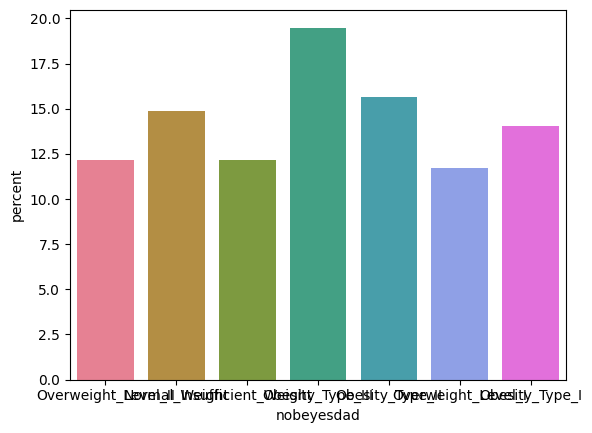

In [16]:
grafico_countplot('nobeyesdad',df)

In [17]:
df['nobeyesdad'].value_counts()

nobeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

El conjunto de datos esta relativamente balanceado, pese que hay cierta variación en las proporciones.

+ **Variable 'age'**

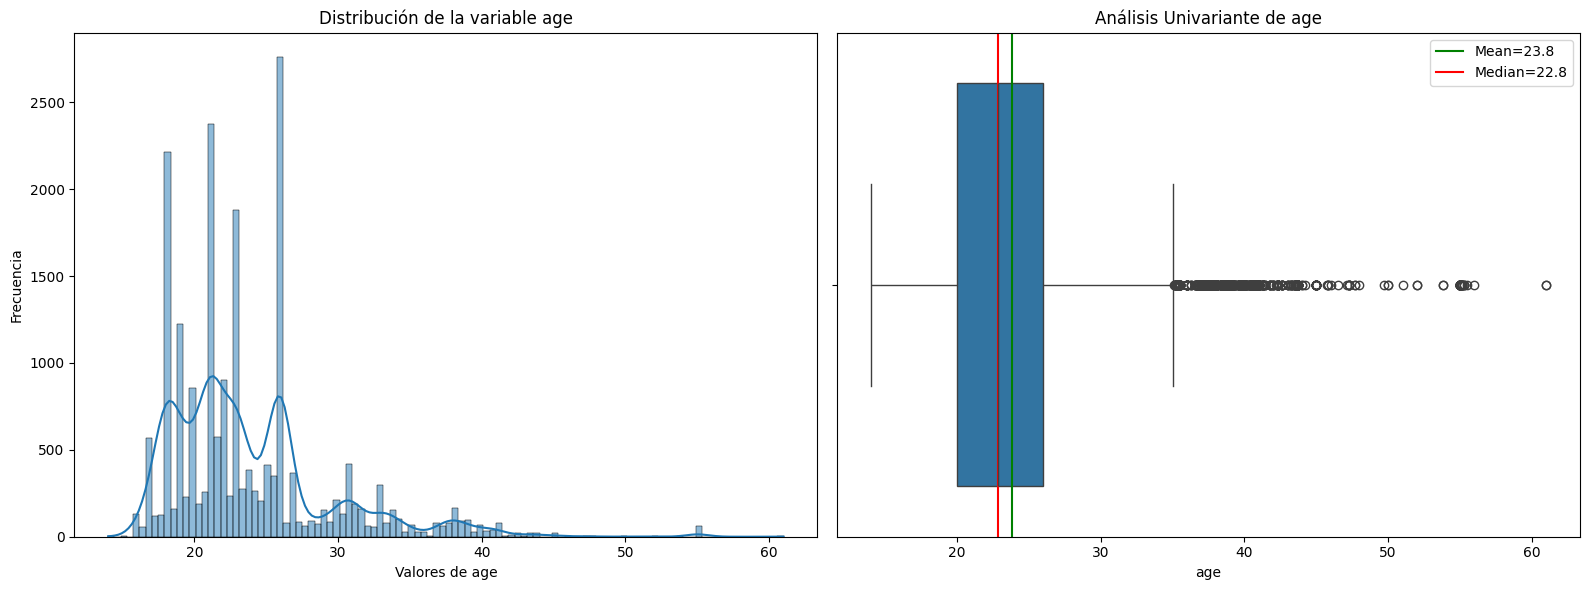

In [18]:
grafico_histbox('age',df)

+ **Variable 'height'**

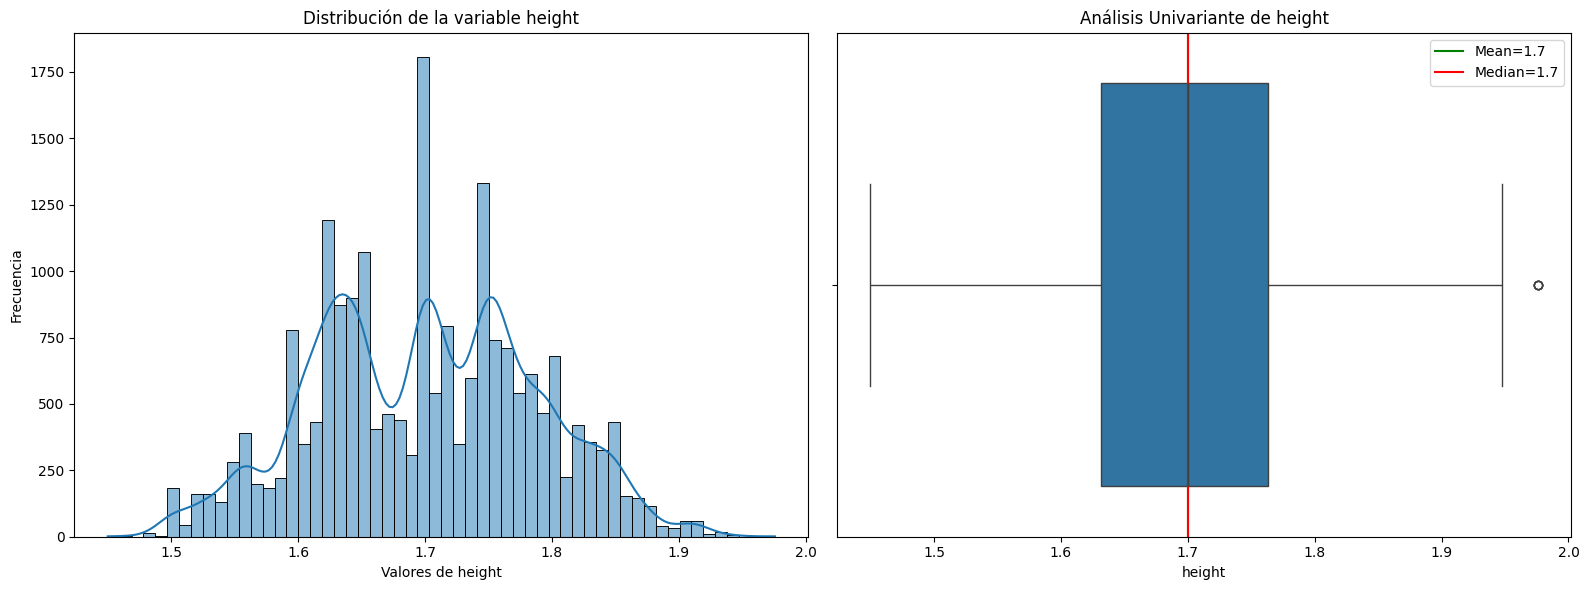

In [19]:
grafico_histbox('height',df)

+ **Variable 'weight'**

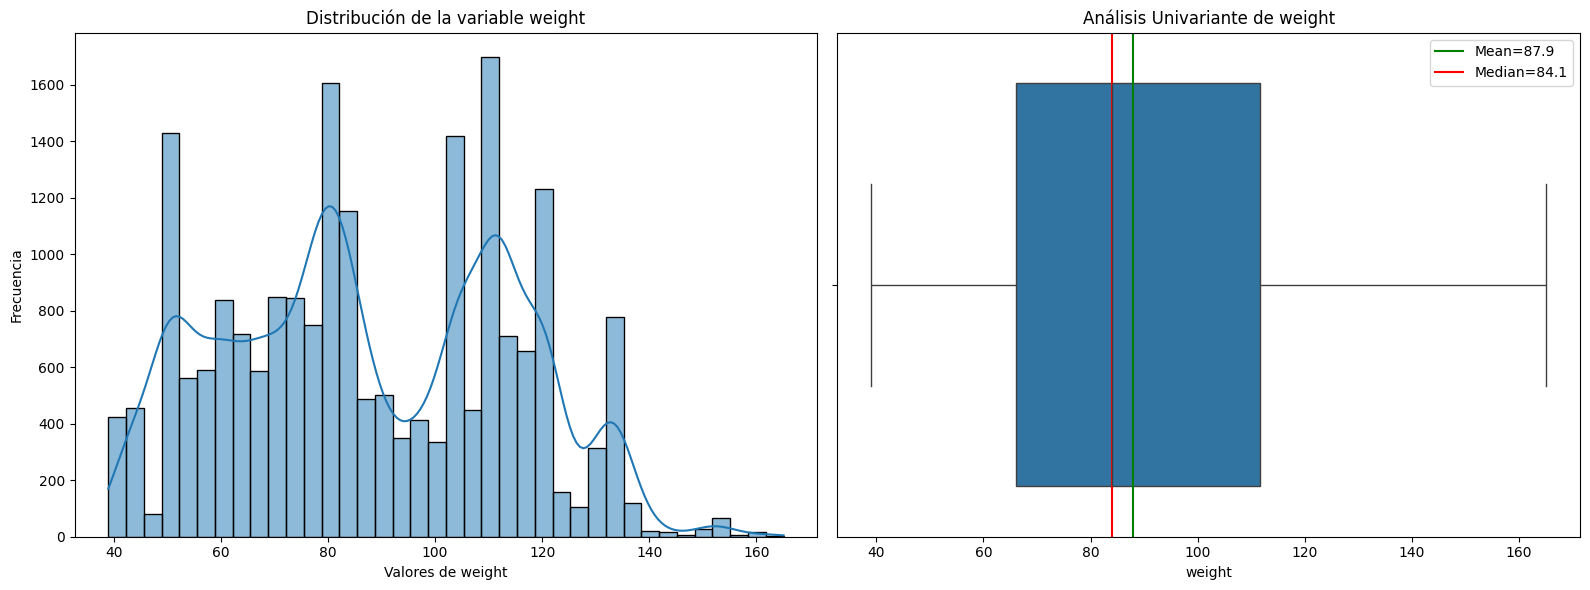

In [20]:
grafico_histbox('weight',df)

+ **Variable 'fcvc'**

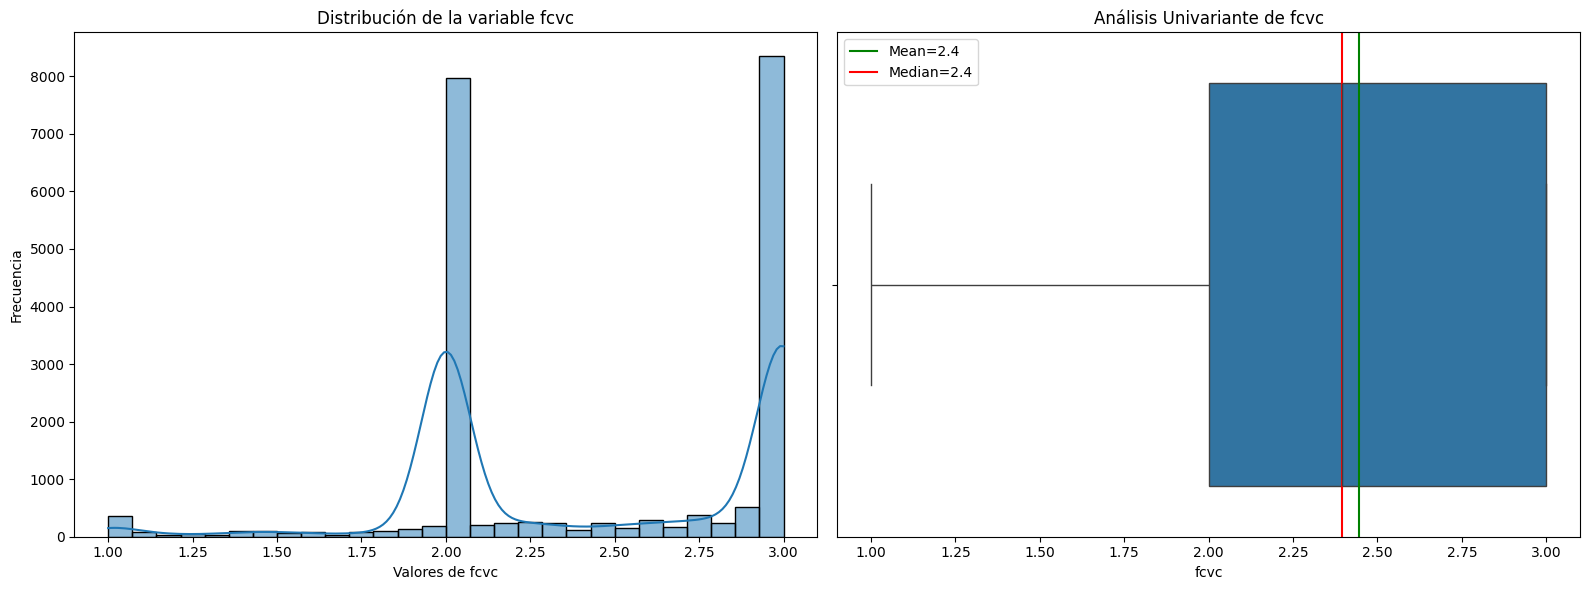

In [21]:
grafico_histbox('fcvc',df)

+ **Variable 'ncp'**

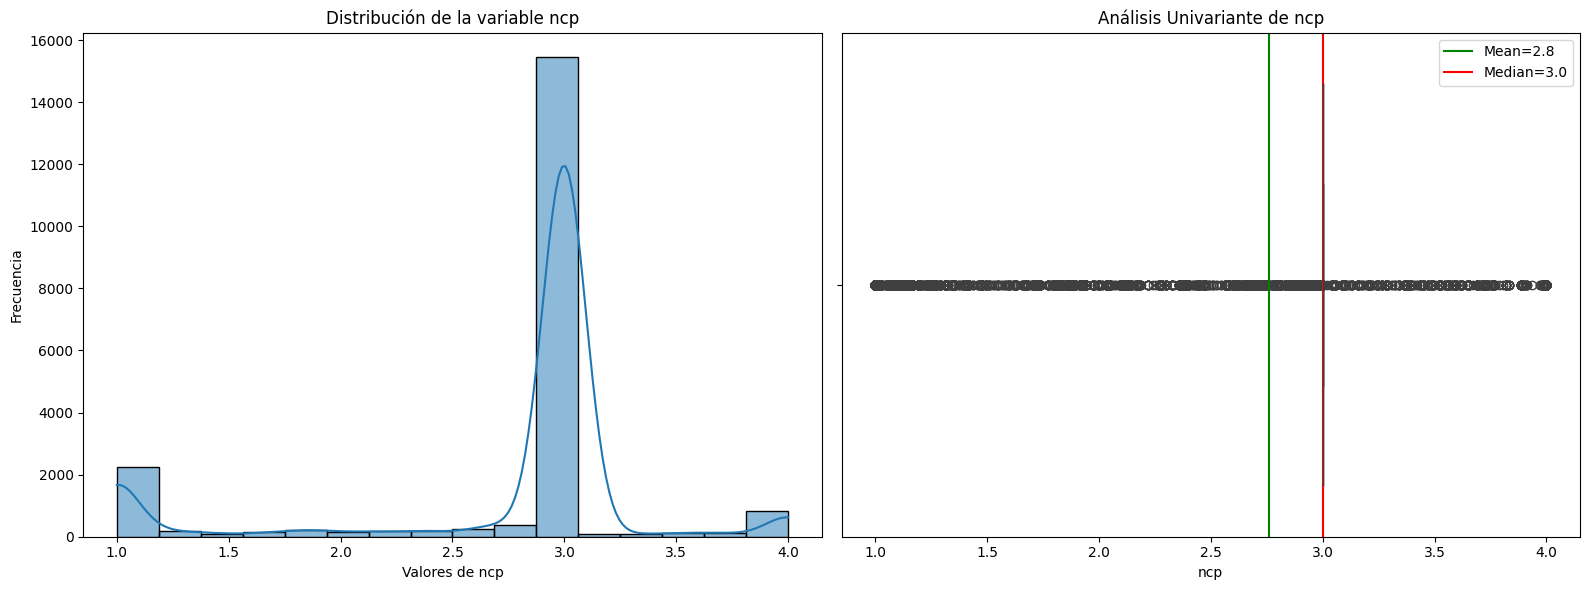

In [22]:
grafico_histbox('ncp',df)

+ **Variable 'ch2o'**

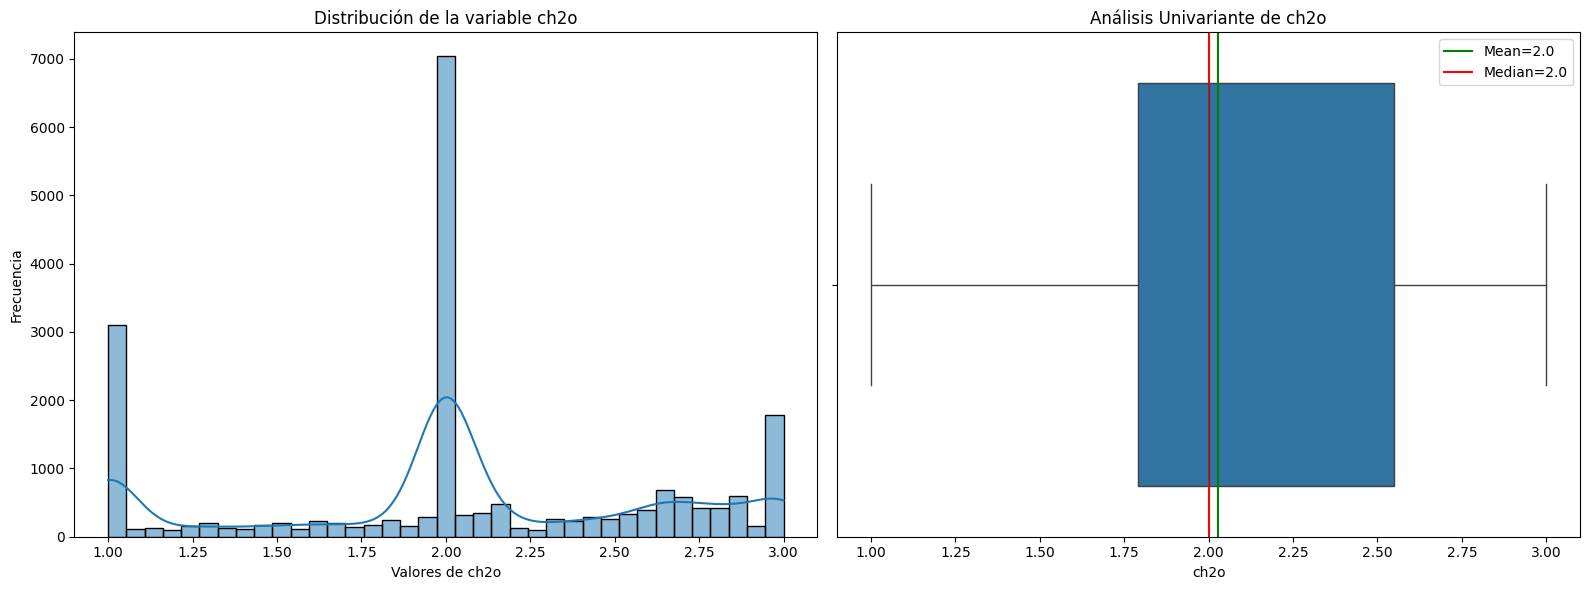

In [23]:
grafico_histbox('ch2o',df)

+ **Variable 'faf'**

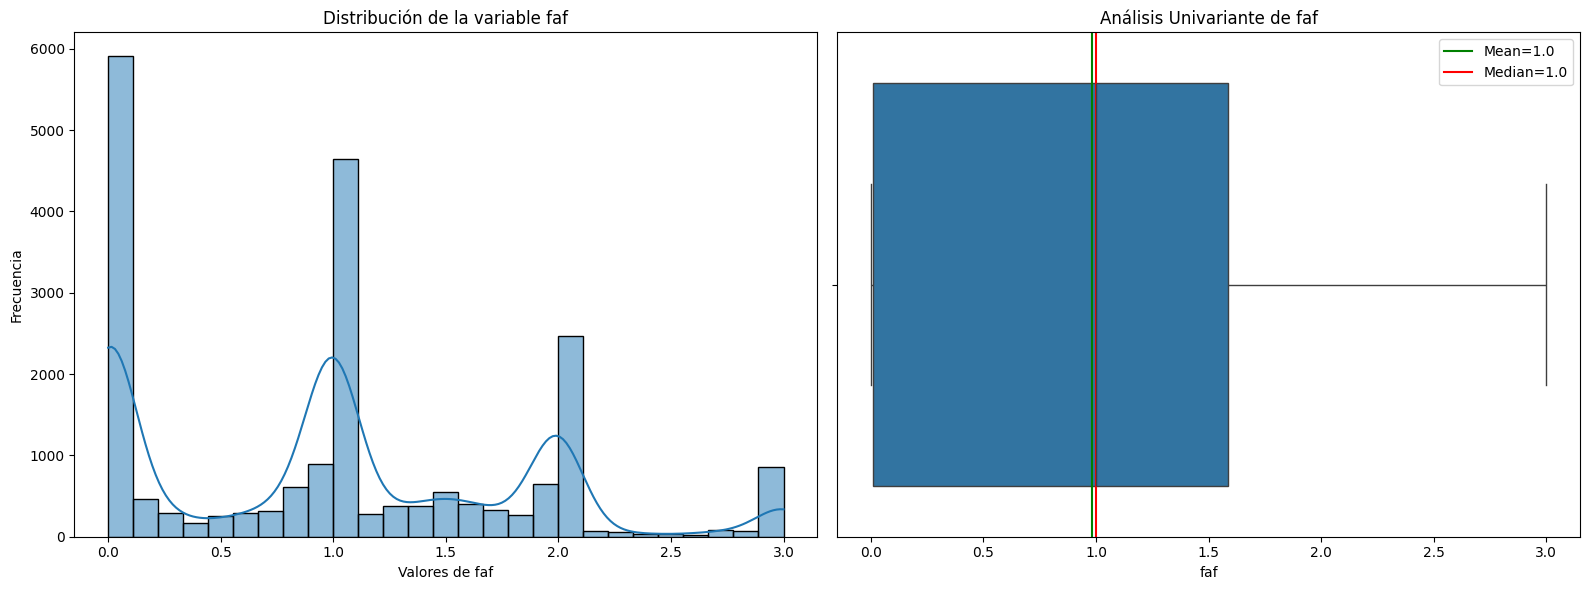

In [24]:
grafico_histbox('faf',df)

+ **Variable 'tue'**

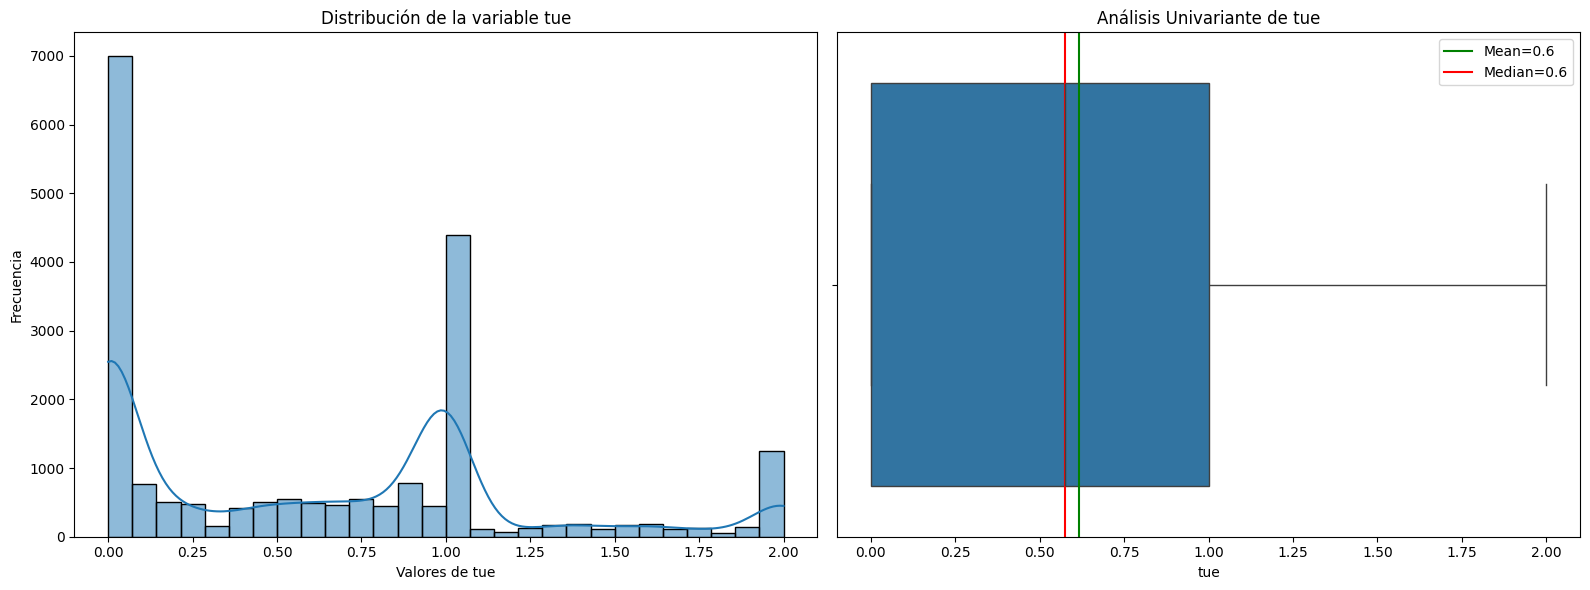

In [25]:
grafico_histbox('tue',df)

In [26]:
numeric_df = df.select_dtypes(include='float64')

# Test de Shapiro-Wilk para cada variable
shapiro_results = {}
for column in numeric_df.columns:
    stat, p_value = shapiro(numeric_df[column])
    shapiro_results[column] = {'Stat': stat, 'p-value': p_value}

shapiro_df = pd.DataFrame.from_dict(shapiro_results, orient='index')

shapiro_df

/var/folders/fs/kg71xbcx2pb2b7c88_g91r8r0000gn/T/ipykernel_4441/3117054348.py:6: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20758.
  stat, p_value = shapiro(numeric_df[column])


,Stat,p-value
age,0.872976,5.895968e-83
height,0.991417,4.967732e-33
weight,0.967094,5.163553e-55
fcvc,0.790347,8.167552e-95
ncp,0.612093,1.756798e-110
ch2o,0.908363,1.157309e-75
faf,0.896881,2.927579e-78
tue,0.858046,1.622851e-85


Basándonos en los valores p obtenidos en el test de Shapiro-Wilk, ninguna de las variables parece seguir una distribución normal, ya que en todos los casos el valor p es menor que cualquier nivel de significancia comúnmente utilizado.

Aunque visualmente la mayoría podrían forzarse a ser normales.

+ **Variable 'gender'**

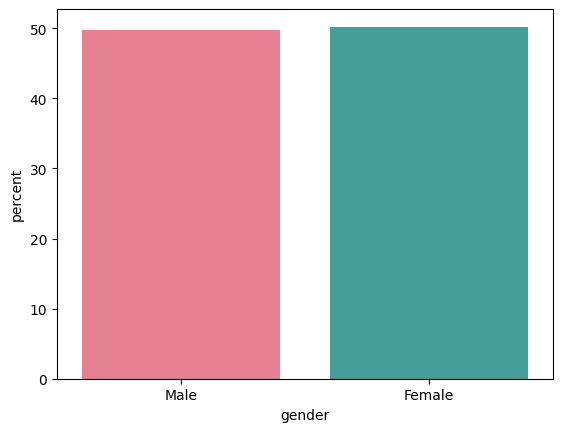

In [27]:
grafico_countplot('gender',df)

In [28]:
df['gender'].value_counts()

gender
Female    10422
Male      10336
Name: count, dtype: int64

+ **Variable 'family'**

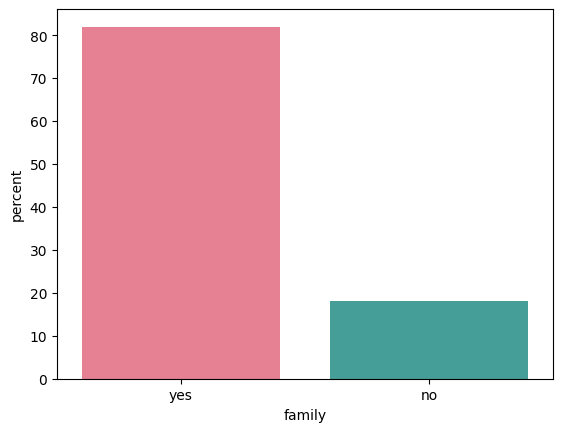

In [29]:
grafico_countplot('family',df)

In [30]:
df['family'].value_counts()

family
yes    17014
no      3744
Name: count, dtype: int64

+ **Variable 'favc'**

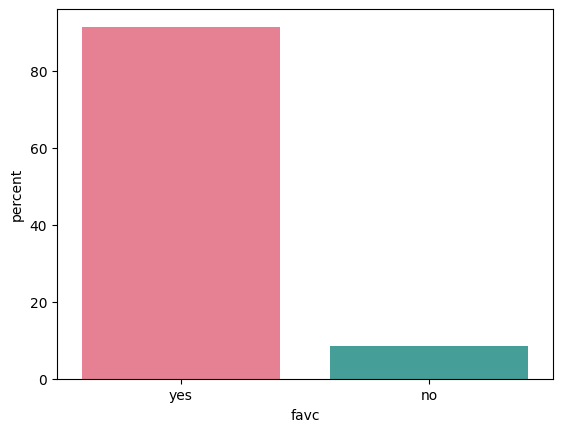

In [31]:
grafico_countplot('favc',df)

In [32]:
df['favc'].value_counts()

favc
yes    18982
no      1776
Name: count, dtype: int64

+ **Variable 'smoke'**

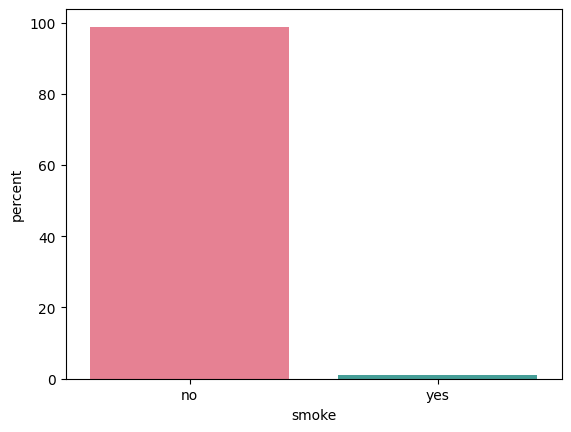

In [33]:
grafico_countplot('smoke',df)

In [34]:
df['smoke'].value_counts()

smoke
no     20513
yes      245
Name: count, dtype: int64

+ **Variable 'scc'**

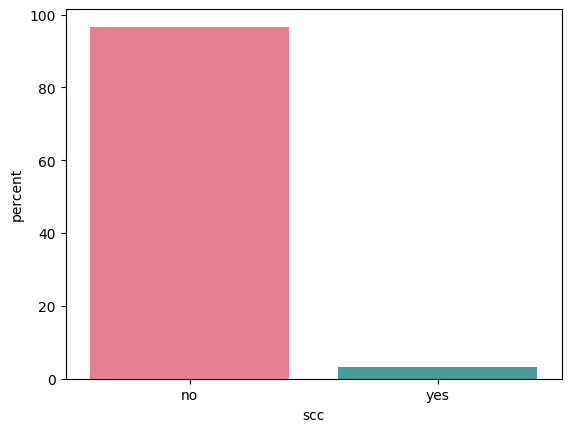

In [35]:
grafico_countplot('scc',df)

In [36]:
df['scc'].value_counts()

scc
no     20071
yes      687
Name: count, dtype: int64

+ **Variable 'caec'**

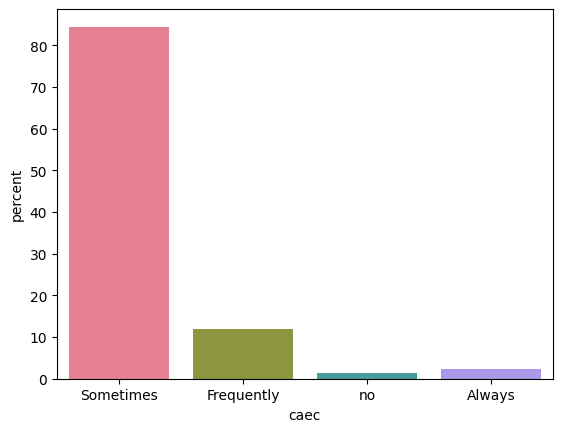

In [37]:
grafico_countplot('caec',df)

In [38]:
df['caec'].value_counts()

caec
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

+ **Variable 'calc'**

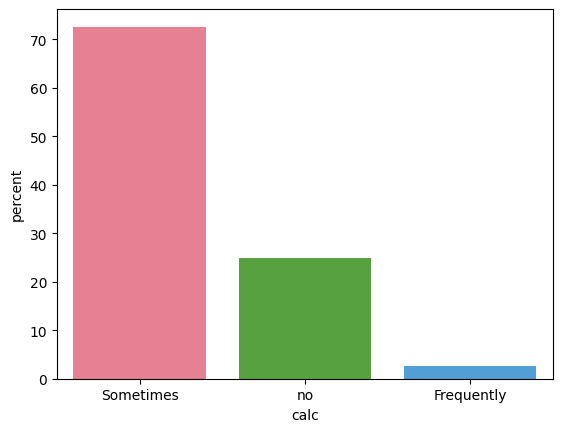

In [39]:
grafico_countplot('calc',df)

In [40]:
df['calc'].value_counts()

calc
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

+ **Variable 'mtrans'**

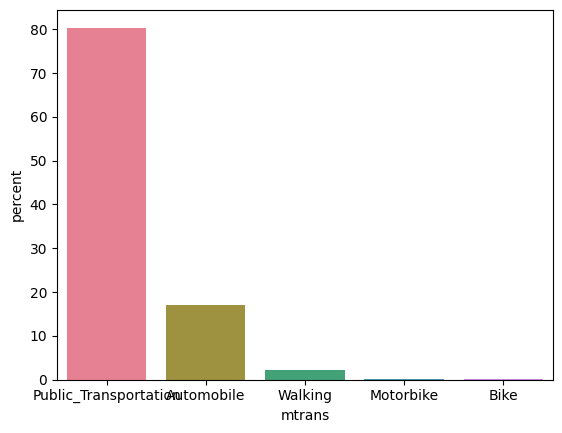

In [41]:
grafico_countplot('mtrans',df)

In [42]:
df['mtrans'].value_counts()

mtrans
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

Parece que podemos tener problemas de cardinalidad con SMOKE y SCC, ambas variables están bastante desbalanceadas.

**5.3.Análisis bivariante**

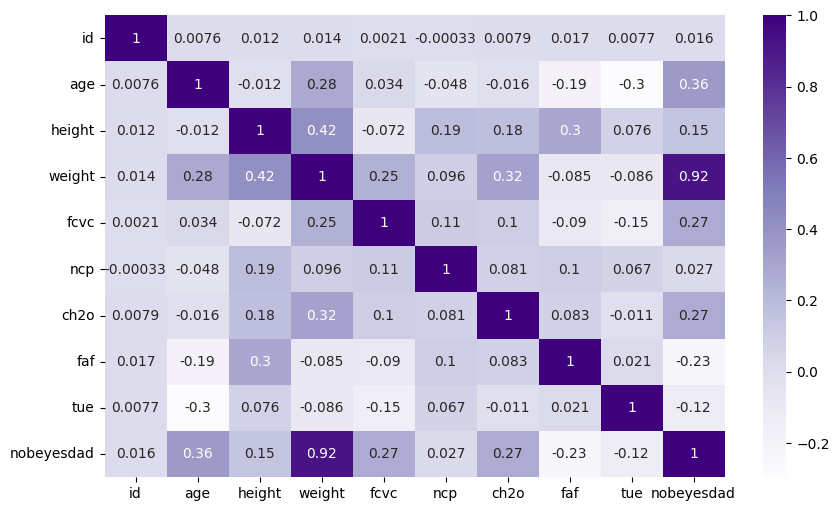

In [43]:
#heatmap

#mapeo provisional de la target

df_map=df.copy()

mapeo_target = {
    'Overweight_Level_II': 3,
    'Normal_Weight': 1,
    'Insufficient_Weight': 0,
    'Obesity_Type_III': 6,
    'Obesity_Type_II': 5,
    'Overweight_Level_I': 2,
    'Obesity_Type_I': 4
}

df_map['nobeyesdad'] = df_map['nobeyesdad'].map(mapeo_target)


plt.figure(figsize=(10, 6))
sns.heatmap(df_map.corr(numeric_only=True), annot=True, cmap='Purples');

La variable 'weight' tiene una alta correlación con la target, lo que es lógico puesto que el peso del individuo influye directamente en el nivel de obesidad en el que se encuentra el mismo, lo trataremos más adelante para que no afecte a la capacidad del modelo.

**'Nobeyesdad' Vs Variables Categóricas**

In [44]:
#Función visualización Categóricas Vs NObeyesdad

def count_graf(columns, df):
    num_plots = len(columns)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols

    plt.figure(figsize=(15, 5*num_rows))
    
    for i, column in enumerate(columns, start=1):
        plt.subplot(num_rows, num_cols, i)
        sns.countplot(x=column, hue='nobeyesdad', data=df)
        plt.xlabel(f'{column}')
        plt.ylabel('Conteo')
        plt.title(f'nobeyesdad Vs {column}')
        plt.legend(title='Clases de obesidad')

    plt.tight_layout()
    plt.show()

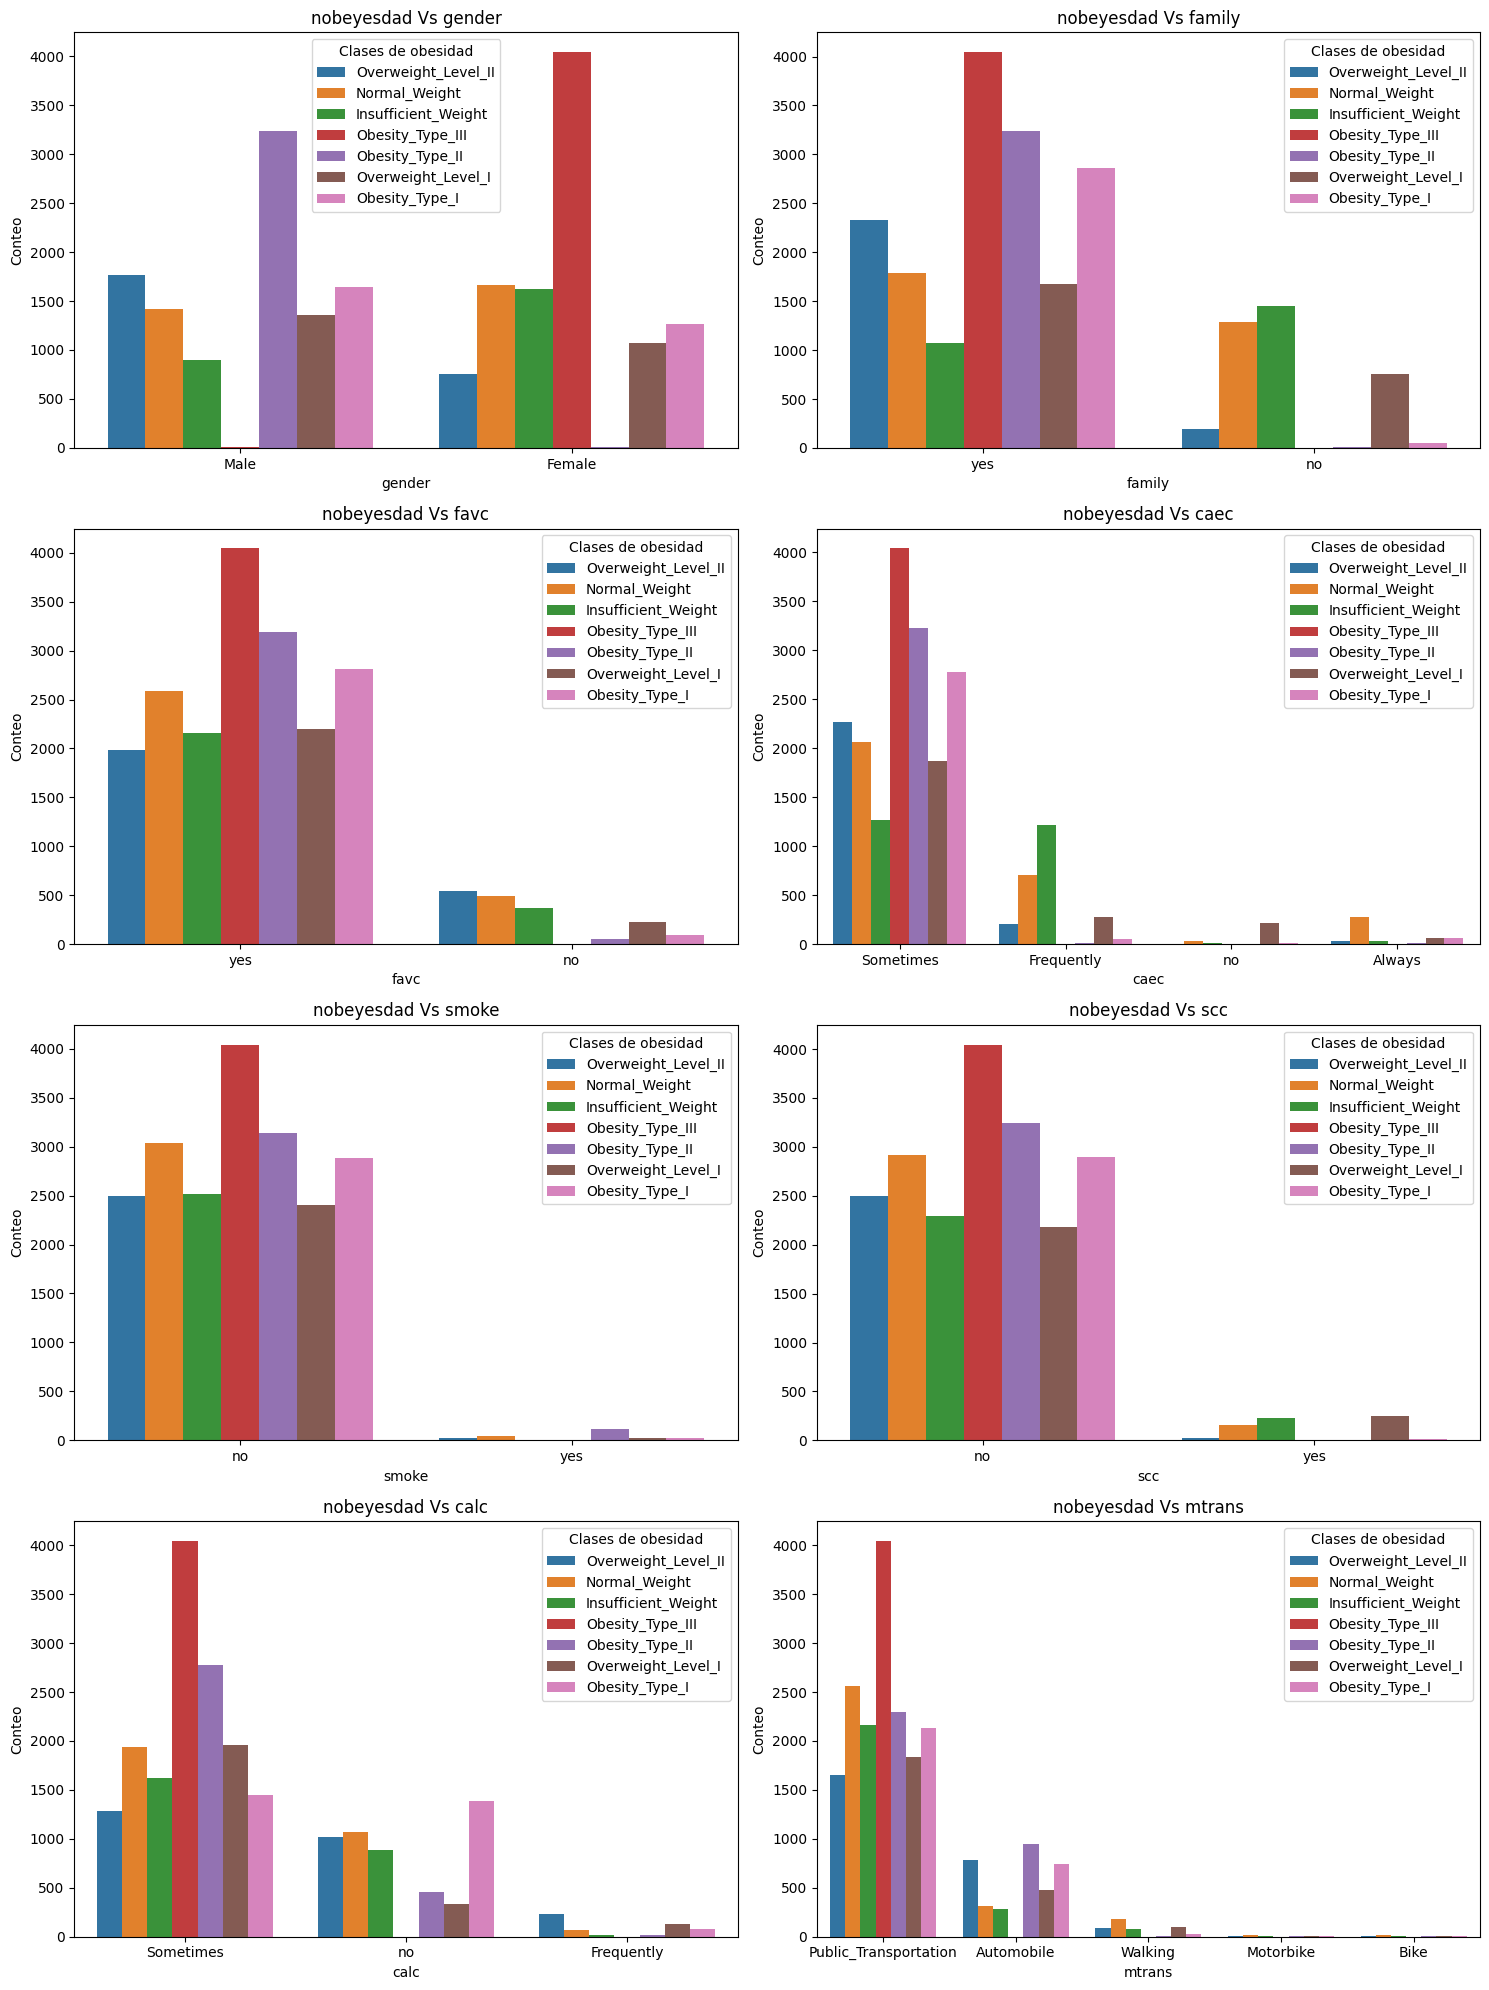

In [45]:
categoricas=['gender','family','favc','caec','smoke','scc','calc','mtrans']
count_graf(categoricas,df)

**'Nobeyesdad' Vs Variables Numéricas'**

In [46]:
#función visualización numéricas

def plot_numericas(numericas, df):
    num_plots = len(numericas)
    num_cols = 1 
    num_rows = (num_plots + num_cols - 1) // num_cols

    colors = sns.color_palette("husl", len(df['nobeyesdad'].unique()))

    plt.figure(figsize=(15, 5*num_rows))
    
    for i, numerical_column in enumerate(numericas, start=1):
        plt.subplot(num_rows, num_cols, i)
        sns.boxplot(x='nobeyesdad',hue='nobeyesdad', y=numerical_column, data=df, palette=dict(zip(df['nobeyesdad'].unique(), colors)))
        plt.xlabel('nobeyesdad')
        plt.ylabel(f'{numerical_column}')
        plt.title(f'{numerical_column} vs "nobeyesdad"')

    plt.tight_layout()
    plt.show()


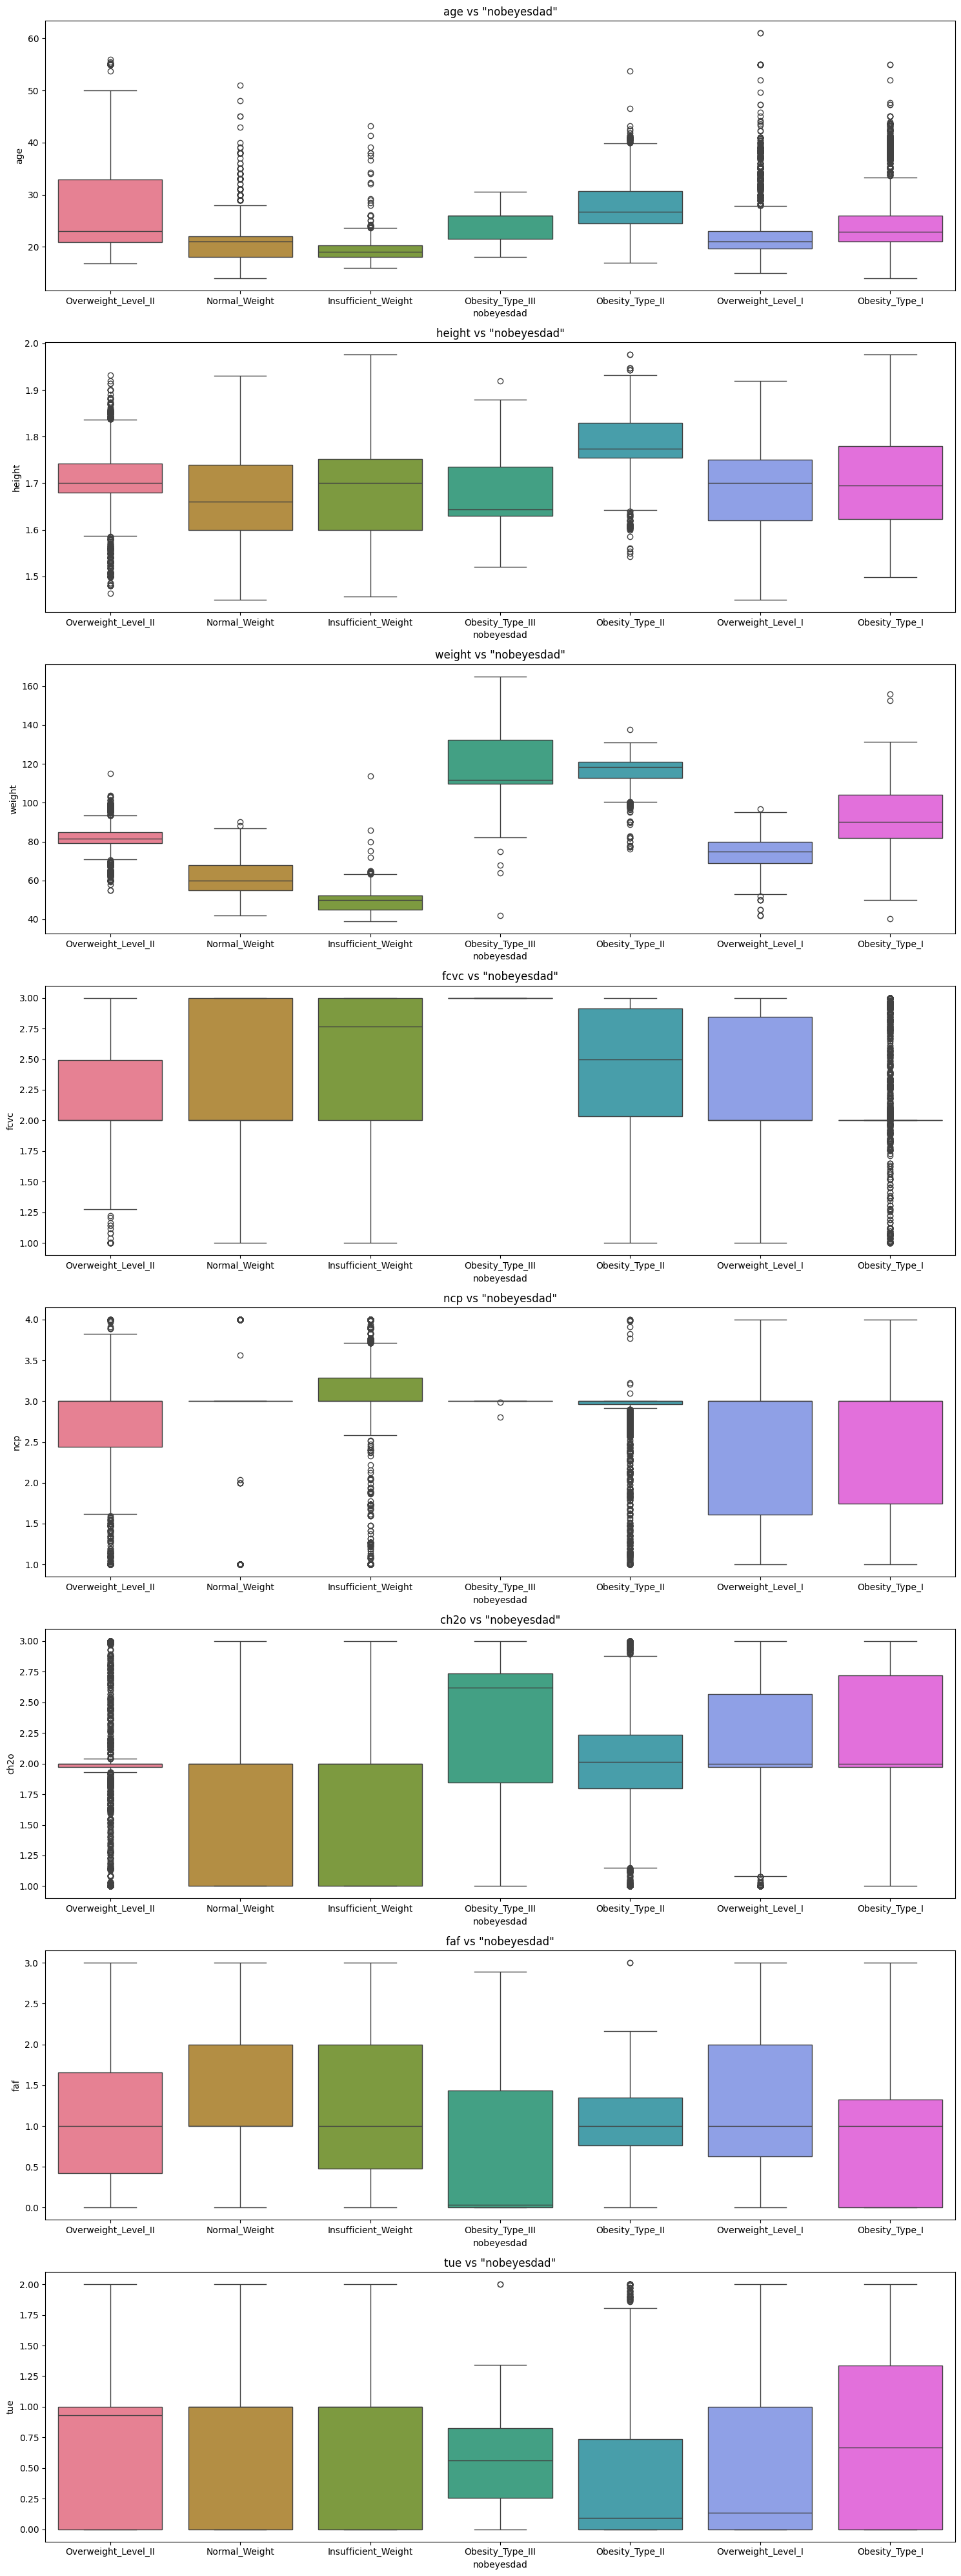

In [47]:
numericas=['age','height','weight','fcvc','ncp','ch2o','faf','tue']
plot_numericas(numericas,df)

**6.División del dataset**

In [48]:
#División dataset----> train y test
train_set, test_set= train_test_split(df, test_size=0.2, random_state=42)

#División train_set---> train y validation
train, val = train_test_split(train_set, test_size=0.2, random_state=42)

# Separar características y etiquetas para conjunto de entrenamiento
X_train = train.drop(['nobeyesdad','id'], axis=1)
y_train = train['nobeyesdad']

# Separar características y etiquetas para conjunto de validación
X_val = val.drop(['nobeyesdad','id'], axis=1)
y_val = val['nobeyesdad']

# Separar características y etiquetas para conjunto de prueba
X_test = test_set.drop(['nobeyesdad','id'], axis=1)
y_test = test_set['nobeyesdad']

In [49]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(13284, 16)
(4152, 16)
(3322, 16)
(13284,)
(4152,)
(3322,)


In [50]:
y_train.head()

1172        Obesity_Type_II
19024         Normal_Weight
14641      Obesity_Type_III
14550    Overweight_Level_I
11564        Obesity_Type_I
Name: nobeyesdad, dtype: object

**7.Preprocesamiento**

In [51]:
col_label = ['caec', 'calc','mtrans']
col_ohe = ['gender', 'family', 'favc','smoke','scc']
esc_columns= ['age','height','fcvc','ncp','ch2o','faf','tue']

#Aplicamos MinMaxScaler
esc = MinMaxScaler()
X_train[esc_columns] = esc.fit_transform(X_train[esc_columns])
X_test[esc_columns] = esc.transform(X_test[esc_columns])
X_val[esc_columns] = esc.transform(X_val[esc_columns])

#Aplicamos OneHot
ohe = OneHotEncoder(drop='first',sparse_output=False, handle_unknown='ignore')

ohe.fit(X_train[col_ohe])

transformed_X_train = ohe.transform(X_train[col_ohe])
transformed_df = pd.DataFrame(transformed_X_train, columns=ohe.get_feature_names_out(col_ohe), index=X_train.index)
X_train_trans= pd.concat([X_train, transformed_df], axis=1).drop(columns=col_ohe)

transformed_X_val = ohe.transform(X_val[col_ohe])
transformed_df = pd.DataFrame(transformed_X_val, columns=ohe.get_feature_names_out(col_ohe), index=X_val.index)
X_val_trans= pd.concat([X_val, transformed_df], axis=1).drop(columns=col_ohe)

transformed_X_test = ohe.transform(X_test[col_ohe])
transformed_df = pd.DataFrame(transformed_X_test, columns=ohe.get_feature_names_out(col_ohe), index=X_test.index)
X_test_trans= pd.concat([X_test, transformed_df], axis=1).drop(columns=col_ohe)

#Aplicamos labelEncoder a col_label
label_encoder = LabelEncoder()
for column in col_label:
    X_train_trans[column] = label_encoder.fit_transform(X_train_trans[column])
    X_val_trans[column] = label_encoder.transform(X_val_trans[column])
    X_test_trans[column] = label_encoder.transform(X_test_trans[column])


#Aplicamos labelEncoder a la target
y_train_trans = label_encoder.fit_transform(y_train)
y_val_trans = label_encoder.transform(y_val)
y_test_trans = label_encoder.transform(y_test)

**8.Cross validation + Base-Lines**

In [53]:
modelos = {
    "Decision Tree": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "XGBClassifier": XGBClassifier(),
    "LGBMClassifier": LGBMClassifier(),
    "Logistic Regression": LogisticRegression(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "HistGradientBossstingClassifier": HistGradientBoostingClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier()
}

resultados = []

# Cross-validation
for nombre, modelo in modelos.items():
    scores = cross_val_score(modelo, X_train_trans, y_train_trans, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    resultados.append({'Modelo': nombre, 'accuracy': mean_score})

results_df = pd.DataFrame(resultados)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2042
[LightGBM] [Info] Number of data points in the train set: 10627, number of used features: 16
[LightGBM] [Info] Start training from score -2.107207
[LightGBM] [Info] Start training from score -1.915512
[LightGBM] [Info] Start training from score -1.957933
[LightGBM] [Info] Start training from score -1.851773
[LightGBM] [Info] Start training from score -1.643122
[LightGBM] [Info] Start training from score -2.141856
[LightGBM] [Info] Start training from score -2.101803
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 203

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [54]:
results_df.sort_values(by= 'accuracy', ascending=False)

,Modelo,accuracy
7,GradientBoostingClassifier,0.902740
4,XGBClassifier,0.902439
5,LGBMClassifier,0.901686
8,HistGradientBossstingClassifier,0.901159
1,RandomForestClassifier,0.897998
0,Decision Tree,0.843722
3,SVC,0.799533
6,Logistic Regression,0.792080
2,KNN,0.711608
9,AdaBoostClassifier,0.433834


In [ ]:
models = [
    ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('XGBClassifier', XGBClassifier()),
    ('LGBMClassifier', LGBMClassifier())
]

# Definir los parámetros
params = [
    {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    },
    {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    },
    {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    }
]

# Realizar la búsqueda de hiperparámetros con Grid Search y validación cruzada
results = {}
for (name, model), param_grid in zip(models, params):
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
    grid_result = grid.fit(X_train_trans, y_train_trans)
    results[name] = {
        'best_params': grid_result.best_params_,
        'best_score': grid_result.best_score_,
        'cv_results': grid_result.cv_results_
    }

# Imprimir los resultados
for name, result in results.items():
    print(f"Modelo: {name}")
    print(f"Mejores hiperparámetros: {result['best_params']}")
    print(f"Mejor score: {result['best_score']}")
    print()


**9.Entrenamiento**

Modelo: XGBClassifier
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Mejor score: 0.9060525220943993

In [52]:
XGB_model = XGBClassifier(learning_rate= 0.1, max_depth= 4, n_estimators= 200,random_state=42)
XGB_model.fit(X_train_trans, y_train_trans)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

**10.Predicción**

In [60]:
y_pred = XGB_model.predict(X_val_trans)
y_pred

array([6, 1, 4, ..., 5, 1, 1])

**11.Validación del modelo**

In [61]:
print(classification_report(y_val_trans, y_pred))
print("Accuracy Score:", accuracy_score(y_val_trans, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       384
           1       0.87      0.90      0.88       499
           2       0.90      0.90      0.90       493
           3       0.97      0.96      0.97       506
           4       1.00      1.00      1.00       674
           5       0.82      0.76      0.79       382
           6       0.80      0.84      0.82       384

    accuracy                           0.91      3322
   macro avg       0.90      0.90      0.90      3322
weighted avg       0.91      0.91      0.91      3322

Accuracy Score: 0.909692956050572


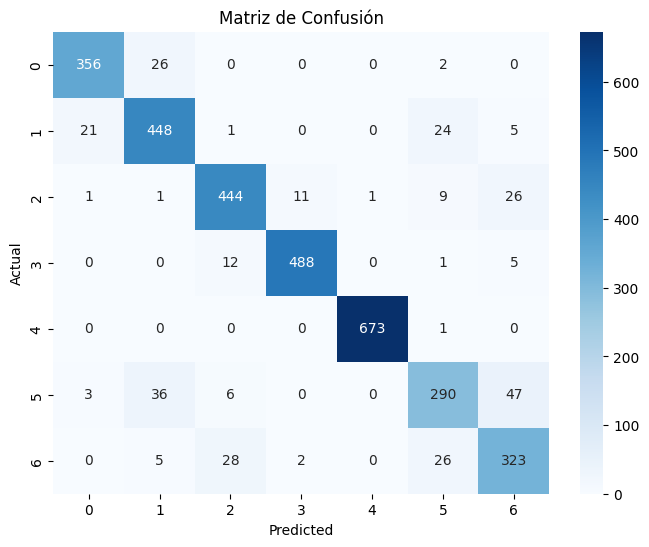

In [62]:
conf_matrix = confusion_matrix(y_val_trans, y_pred)

# Crea un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


**12.Predicción con test**

In [63]:
y_pred = XGB_model.predict(X_test_trans)
y_pred

array([4, 5, 2, ..., 2, 5, 6])

In [64]:
print(classification_report(y_test_trans, y_pred))
print("Accuracy Score:", accuracy_score(y_test_trans, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       524
           1       0.87      0.89      0.88       626
           2       0.89      0.86      0.88       543
           3       0.98      0.97      0.97       657
           4       0.99      1.00      1.00       804
           5       0.79      0.79      0.79       484
           6       0.78      0.81      0.80       514

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152

Accuracy Score: 0.903179190751445


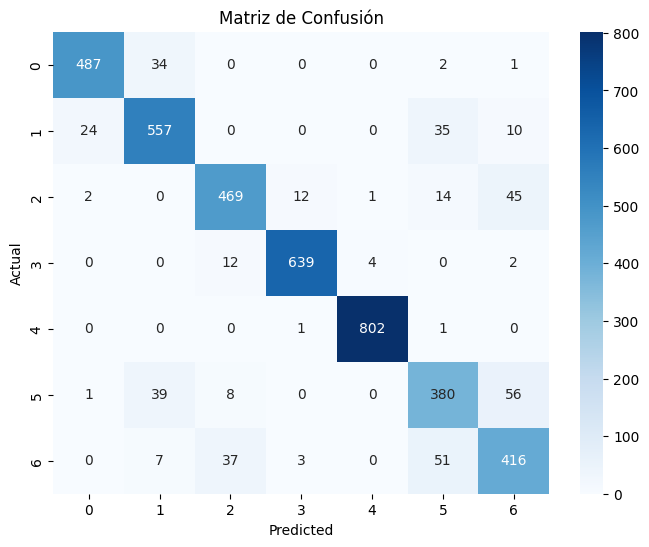

In [66]:
conf_matrix = confusion_matrix(y_test_trans, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


El modelo obtiene un accuracy de 0.909 en los datos de validación y un 0.903 en los datos de test, por lo que el modelo generaliza bien.